<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To perform Principal Component Analysis (PCA) in Python using both the manual method and the library method, and to compare their results**

## Manual method

In [50]:
#Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [51]:
#Load the Iris dataset
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [52]:
#Standardize the data
for i in df.columns:
  df[i]=(df[i]-df[i].mean())/df[i].std()
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.015602          -1.335752         -1.311052
1            -1.139200         -0.131539          -1.335752         -1.311052
2            -1.380727          0.327318          -1.392399         -1.311052
3            -1.501490          0.097889          -1.279104         -1.311052
4            -1.018437          1.245030          -1.335752         -1.311052
..                 ...               ...                ...               ...
145           1.034539         -0.131539           0.816859          1.443994
146           0.551486         -1.278680           0.703564          0.919223
147           0.793012         -0.131539           0.816859          1.050416
148           0.430722          0.786174           0.930154          1.443994
149           0.068433         -0.131539           0.760211          0.788031

[150 rows x 4 columns]


In [53]:
#Calculate the covariance matrix
cov=np.cov(df, rowvar=False)
print(cov)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [54]:
#Compute eigenvalues and eigenvectors
val,vec=np.linalg.eig(cov)
sorted_index = np.argsort(val)[::-1]
val=val[sorted_index]
vec=vec[sorted_index]
print("Eigenvalue: ",val)
print("Eigenvector: ",vec)

Eigenvalue:  [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvector:  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [59]:
#Select the top 2 principal components
vec_subset=vec[:,:2]
print(vec_subset)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [61]:
#Transform the data
matrix=np.dot(df,vec_subset)
print(matrix[:5,:])

[[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]]


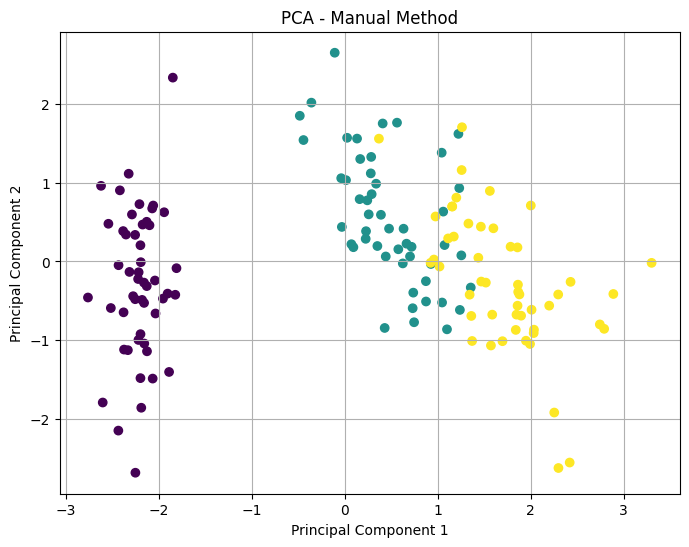

In [62]:
#Visualize the transformed data
plt.figure(figsize=(8,6))
plt.scatter(matrix[:,0],matrix[:,1],c=iris['target'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Manual Method")
plt.grid()
plt.show()

## Python Library Method

In [9]:
#Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
#Load the Iris dataset
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [13]:
#Standardize the data
scaler=StandardScaler()
df=scaler.fit_transform(df)
print(df[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [34]:
#Apply PCA with 2 components
pca=PCA(n_components=2)
result=pca.fit_transform(df)
print(result[:5])

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


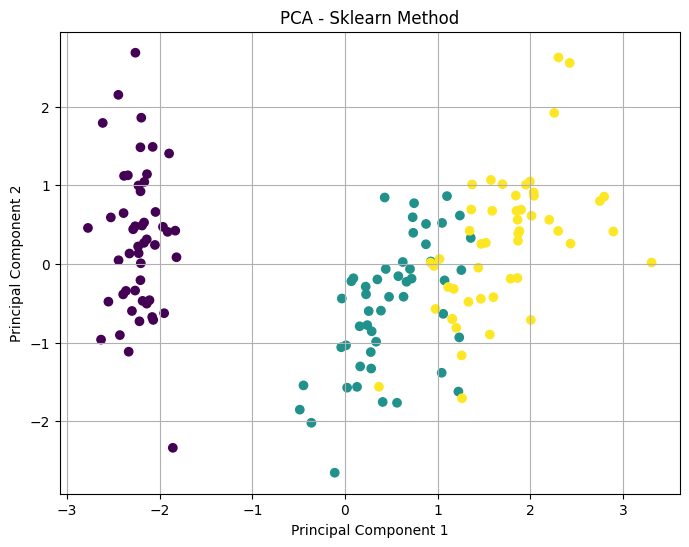

In [37]:
#Visualize the transformed data
plt.figure(figsize=(8,6))
plt.scatter(result[:,0],result[:,1],c=iris['target'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Sklearn Method")
plt.grid()
plt.show()